In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [3]:
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

In [27]:
cur.execute("""SELECT b.title AS movie, b.domestic_gross, b.foreign_gross, m.genres 
               FROM bom_movie_gross b
               JOIN imdb_title_basics m
               ON b.title = m.primary_title
               GROUP BY movie;""")
gross_df = pd.DataFrame(cur.fetchall())
gross_df.columns = [x[0] for x in cur.description]
gross_df

,movie,domestic_gross,foreign_gross,genres
0,'71,1300000.0,355000,"Action,Drama,Thriller"
1,"1,000 Times Good Night",53900.0,None,"Drama,War"
2,10 Cloverfield Lane,72100000.0,38100000,"Drama,Horror,Mystery"
3,10 Years,203000.0,None,"Comedy,Drama,Romance"
4,1001 Grams,11000.0,None,Drama
...,...,...,...,...
2600,Zindagi Na Milegi Dobara,3100000.0,None,"Comedy,Drama"
2601,Zombeavers,14900.0,None,"Action,Adventure,Comedy"
2602,Zookeeper,80400000.0,89500000,"Comedy,Family,Romance"
2603,Zoolander 2,28800000.0,27900000,Comedy


In [28]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','').astype(float)

In [29]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           2605 non-null   object 
 1   domestic_gross  2588 non-null   float64
 2   foreign_gross   1564 non-null   float64
 3   genres          2568 non-null   object 
dtypes: float64(2), object(2)
memory usage: 81.5+ KB


In [35]:
gross_df['split_genres'] = gross_df['genres'].str.split(',')
gross_df = gross_df.dropna(subset = ['genres'])
gross_df

,movie,domestic_gross,foreign_gross,genres,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller","[Action, Drama, Thriller]"
1,"1,000 Times Good Night",53900.0,NaN,"Drama,War","[Drama, War]"
2,10 Cloverfield Lane,72100000.0,38100000.0,"Drama,Horror,Mystery","[Drama, Horror, Mystery]"
3,10 Years,203000.0,NaN,"Comedy,Drama,Romance","[Comedy, Drama, Romance]"
4,1001 Grams,11000.0,NaN,Drama,[Drama]
...,...,...,...,...,...
2600,Zindagi Na Milegi Dobara,3100000.0,NaN,"Comedy,Drama","[Comedy, Drama]"
2601,Zombeavers,14900.0,NaN,"Action,Adventure,Comedy","[Action, Adventure, Comedy]"
2602,Zookeeper,80400000.0,89500000.0,"Comedy,Family,Romance","[Comedy, Family, Romance]"
2603,Zoolander 2,28800000.0,27900000.0,Comedy,[Comedy]


In [36]:
gross_df = gross_df.explode('split_genres')
gross_df

,movie,domestic_gross,foreign_gross,genres,split_genres
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",Action
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",Drama
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",Thriller
1,"1,000 Times Good Night",53900.0,NaN,"Drama,War",Drama
1,"1,000 Times Good Night",53900.0,NaN,"Drama,War",War
...,...,...,...,...,...
2602,Zookeeper,80400000.0,89500000.0,"Comedy,Family,Romance",Romance
2603,Zoolander 2,28800000.0,27900000.0,Comedy,Comedy
2604,Zootopia,341300000.0,682500000.0,"Adventure,Animation,Comedy",Adventure
2604,Zootopia,341300000.0,682500000.0,"Adventure,Animation,Comedy",Animation


<AxesSubplot:xlabel='split_genres'>

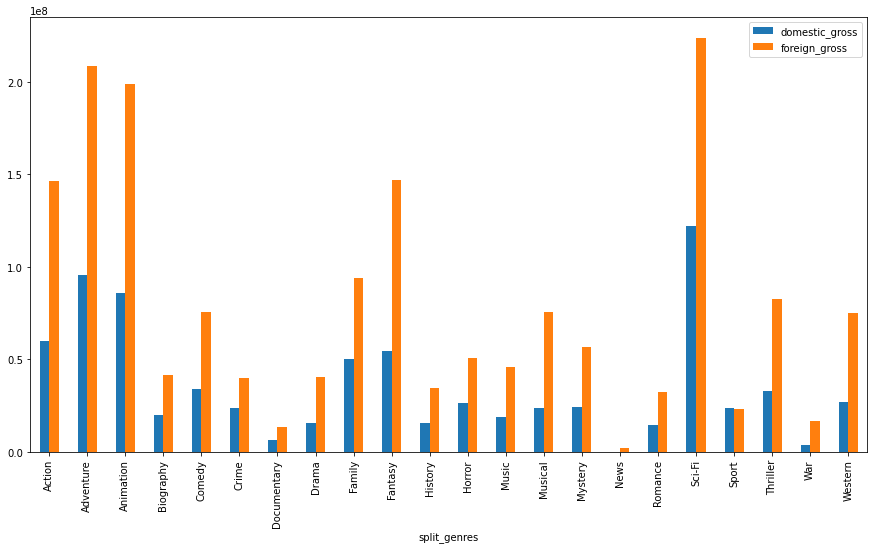

In [42]:
gross_df.groupby('split_genres').mean().plot(figsize=(15,8), kind='bar')

In [37]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [16]:
gross_df.info

<bound method DataFrame.info of                        movie  domestic_gross foreign_gross  \
0                        '71       1300000.0        355000   
0                        '71       1300000.0        355000   
0                        '71       1300000.0        355000   
1     1,000 Times Good Night         53900.0          None   
1     1,000 Times Good Night         53900.0          None   
...                      ...             ...           ...   
2602               Zookeeper      80400000.0      89500000   
2603             Zoolander 2      28800000.0      27900000   
2604                Zootopia     341300000.0     682500000   
2604                Zootopia     341300000.0     682500000   
2604                Zootopia     341300000.0     682500000   

                          genres split_genres  
0          Action,Drama,Thriller       Action  
0          Action,Drama,Thriller        Drama  
0          Action,Drama,Thriller     Thriller  
1                      Drama,Wa

TypeError: unhashable type: 'numpy.ndarray'

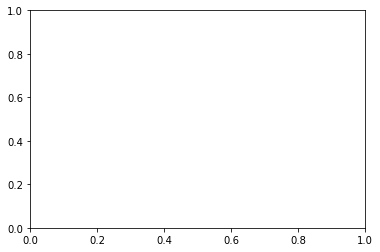